
# 5:  The Normal or Gaussian Distribution: 

These problems are provided as Jupyter notebooks, so that you can edit your own version and include some simple calculations. You don't have to - you can do your own calculations any way you like - but it will get you used to doing statistics calculations with Python, which will gradually be more powerful in later weeks.


**Python setup**

Once again, start by loading up some standard Python modules.

In [1]:
from math import *  # basic maths routines
import numpy as np  # more advanced maths routines
from scipy import stats, special # stats routines, e.g. binomial and Poisson distributions


# Level 1 Problems: simple calculations
These are what you might call "plug-in" problems. If you identify the concept or key formula that applies, it should be a fairly simple calculation to get the right answer.

### P5.1 Comparing two Gaussians (L1)
Distribution A is a Gaussian PDF $p_A(x)$ with $\mu=0$ and $\sigma=1$. Distribution B is a Gaussian $p_B(x)$  with $\mu=3$ and $\sigma=1$. For what values of $x$ does $p_B$ exceed $p_A$?

**Solution**  
This is simply a question of finding the value of $x$ where the two functions are equal. We have

$$p(x)=\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma} \right)^2}$$

and the value of $\sigma=1$ is the same in both cases, so the functions are equal where the exponents are equal, i.e. where $(x-\mu_A)^2=(x-\mu_B)^2$. We have $\mu_a=0$ and $\mu_B=3$ and so we want the solution of

$$x^2 = (x-3)^2$$

This has three solutions: $x=+\infty ,  x=-\infty$, and $x=3/2$. 

So the answer is that $p_B$ exceeds $p_A$ when $x>3/2$. 

### P5.2 Finding Gaussian width formulae (L1)
Show that for a Gaussian, FWHM=2.355$\sigma$. What is the Full Width at 20\% of maximum?

**Solution**  
It is simplest to work in terms of the standard form of the Gaussian, centred on zero with unit variance, that is

$$f(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}$$

Then the maximum, at $z=0$, is $f_{max} = 1/\sqrt{2\pi}$. In terms of the height scaled to the maximum, $r=f/f_{max}$ we then have 

$$r(z) =  e^{-z^2/2} {\rm \qquad and\; so \qquad} z^2 = -2 \ln(r)$$

For 50\% of maximum, $r=1/2$; for 20% of maximum $r=1/5$. Note that the full width is at $\pm z$. So:

In [2]:
## half max
r=0.5
z=sqrt(-2.* log(r))
FWHM=2*z
print("At half maximum, FWHM= ",round(FWHM,3))
## 20% max
r=0.2
z=sqrt(-2.* log(r))
FW20=2*z
print("At half maximum, FW20= ",round(FW20,3))

At half maximum, FWHM=  2.355
At half maximum, FW20=  3.588


# Level 2 Problems: formulating problems
These are more like real-world problems. The key skill is being able to translate a physical description into appropriate mathematics, and then identifying the concepts and formulae you need to apply. Sometimes at that point its a straightforward calculation, but more often you need a bit more mathematical manipulation, keeping the physical meaning in mind, and then finally calculating.   

### P5.3 Coin toss approximation (L2)
What is the probability of getting 6 heads and 10 tails in 16 tosses of a coin? First calculate the exact answer, then try using the Gaussian approximation and compare the answer. (The Gaussian is of course a distribution for a continuous random variable. Consider a range of $x$ that approximates the relevant value.)

**Solution**  
The exact answer comes from the binomial distribution for $n=16$, $p=1/2$, and $x=6$. So we get 

In [3]:
n=16
p=0.5
x=6
f=stats.binom.pmf(x,n,p)
print("Exact binomial probability for 6 heads out of 16 tosses= ", round(f,5))

Exact binomial probability for 6 heads out of 16 tosses=  0.12219


The mean of the binomial is $\mu=np=8$ and the standard deviation is $\sigma=(np(1-p))^{1/2}=2$.  To look at the Gaussian approximation, we use the same values of $\mu$ and $\sigma$ in the Gaussian formula.

Te Gaussian is a continuous distribution, so the probability of getting precisely $x=6$ is zero.
To approximate $x=6$ we integrate between 5.5 and 6.5. 

Method 1 would be to get the Gaussian PDF at $x=6$, per unit x, and multiply by 1...  
Method 2 would be to get CDF at 6.5 and 5.5 and subtract

As we see in the calculation below, both appoximations are within 0.001, so by
$n=16$ the binomial is already very close to a Gaussian.

In [4]:
mu=8.0
sig=2.0
pden=stats.norm.pdf(x,mu,sig)
papprox1=pden*1.0
print("First Gaussian approx=", round(papprox1,5))

x=5.5; p1=stats.norm.cdf(x,mu,sig)
x=6.5; p2=stats.norm.cdf(x,mu,sig)
papprox2=p2-p1
print("Second Gaussian approx=", round(papprox2,5))

First Gaussian approx= 0.12099
Second Gaussian approx= 0.12098


### P5.4 Mosquito lethality approximation (L2)
What is the probability that at least 70 out of 100 mosquitos will be killed by a new insect spray, if the probability that any one mosquito will be killed by the spray is 0.75? Use a gaussian approximation, and compare to the exact version if you wish.

**Solution**  
In principle, this is a binomial distribution problem. The Gaussian approximation is easy using either the Python routine or a printed table. Doing the exact binomial calculation is very hard if you do it manually -  probability of 70, the probability of 71, of 72, and so on, adding them all up, which would be painful. The answers would be getting smaller after a while, so we could stop early, but it would still be laborious. However of course Python will do all that for you.

We need to to use $n=100$, and $p=0.75$, then look at $P(\geq x=70)$

As we see below, there is roughly a 90\% chance that at least 70 mosquitos will be killed.

In [5]:
p=0.75
n=100
mu=n*p
sigma=sqrt(n*p*(1.-p))
print("mu= ",mu,"sigma= ",round(sigma,3))
## Gaussian approx, look at CDF above x=69.5 
x=69.5; z=(x-mu)/sigma
print("for x=69.5 we are at z= ", round(z,2))

PG=1.-stats.norm.cdf(x,mu,sigma)
print("Gaussian approx: prob above 69.5= ",round(PG,4))


## Exact binomial version
x=70; PB=stats.binom.sf((x-1),n,p) # summed prob at x=70 and above, i.e. above 69
print("Exact Binomial: prob at 70 and above= ",round(PB,4))


mu=  75.0 sigma=  4.33
for x=69.5 we are at z=  -1.27
Gaussian approx: prob above 69.5=  0.898
Exact Binomial: prob at 70 and above=  0.8962


### P5.5 Toothpaste stock (L2)
A chemist sells on average 150 tubes a week of a particular brand of toothpaste. If they want to make sure that that there is at most a 5\% chance of running out in a given week, how many should they keep in stock?  What if they were sold in packs of two?

**Solution**  

We can start with a back-of-envelope estimate.  Assuming the buying decisions are independent (i.e. no big toothpaste advertising campaigns), fluctuations typically go as $\pm\sqrt(N)=\pm\sqrt(150)=\pm 12.25$.  So 163 should be fine.   If we notice that 95$\%$ confidence is more than one sigma, it should be a bit more than that. 

More mathematically, we note that this should follow the Poisson distribution of random rare events, and we can than use the Gaussian approximation.
For a mean of $N=150$, the standard deviation is $\sigma=\sqrt{N}=12.25$.

As often, its easiest to think in terms of the normalised distance from the mean,  $z=(x-\mu)/\sigma$  
How large a value of $z$ do we need to go that such that  $P(>z)=0.05$ ?   

Note that we want the one-tailed integral - we are not interested in cases where the chemist sells less than average.

We can get the $z$ value from the $P$ value  from a standard table, or by using the Python norm.ppf function (see the Gaussian areas notebook). What we need is $z=1.64$. 

In [6]:
P=0.95
N = 150
z=stats.norm.ppf(P)
print("for P(< z)= ",P, "z= ",round(z,2))
fluct = z*sqrt(N)
print("Expected sales to 95% confidence =",N,'\u00b1',ceil(fluct))  #  Using the unicode symbol for +-

for P(< z)=  0.95 z=  1.64
Expected sales to 95% confidence = 150 ± 21


So we want the value $x=\mu + z\sigma$, where we use $z=1.64$, $\mu=N=150$, and $\sigma=\sqrt{N}$. 

This gives $x=170.1$. So the chemist should keep at least 171 tubes in stock each week.   

If they are sold in packs of two, the events are not independent:  the number of independent event drops to 75  changing $N$ above gives $75\pm 15$, doubling it up means he should stock 180 double-tubes.

### P5.6 Counting chickens (L2)
Chickens weighing $3\pm 0.5$kg are offered for sale.   I buy 100 chickens and find they weigh a total of 250kg, the salesfox explains that this is within expected normal distribution variation since $\sigma=0.5$kg per chicken - Is it true?

In batches of 100 chickens, what is the mean and standard deviation for the number of chickens weighing more than 3.5kg


**Solution**  
This question is about adding variances.  Assuming the weight of single a chicken to be a gaussian random variable, it has $\mu_1=3$ and $\sigma_1=0.5$; variance $\sigma_1^2=0.25$.   For 100 chickens, we are combining random variables  so we add the means and variances: $\mu_{100}=300$kg; $\sigma_{100}^2=25$kg$^2$.  Then converting the variance back to standard deviation we find $300\pm 5$kg.   The 50kg deficit is a 10$\sigma$ event - there is less than $10^{-23}$ probability of it happening by chance.

16\% of the chickens will be more than $1\sigma$ in weight, so we can expect 16 per batch.  Treating this as a Poisson distribution, we expect varaince $\sigma^2=\mu=16$.  So the distribution is $16\pm 4$ chickens per batch.

An exactly equivalent approach is to call this the error on the mean.  For 100 chickens, the mean is 300kg, but the Error on the mean" is now $\sigma_err=0.5*\sqrt(100)$=5kg.   The 250kg offered is a 10$\sigma_{err}$ discrepancy. 

# Level 3 Problems: mathematical exercises

This week's level 3 problems are mainly covering mathematical proofs skipped over in the lectures.  They are included for mathematical interest but not essential for understanding the fundamentals of the course.

### P5.7 Gaussian as a triangle (L3)
Show that one standard deviation from the mean is where the Gaussian has the steepest slope. If you draw a tangent to the curve at this point, where does it intercept the x-axis?

**Solution** 
Again, this is easiest using the standard form $f(z)$. The slope is $df/dz$, so we want to find $z$ where $d^2f/dz^2=0$.

\begin{align*}
f &=\frac{1}{\sqrt{2\pi}} e^{-z^2/2} \\
\frac{df}{dz} &= \frac{1}{\sqrt{2\pi}} \cdot -z e^{-z^2/2} \\
\frac{d^2f}{dz^2} &= 
\frac{1}{\sqrt{2\pi}} \left(z e^{-z^2/2}.\frac{-2z}{2} + 1.e^{-z^2/2} \right) \\
&= \frac{1}{\sqrt{2\pi}}. e^{-z^2/2} (1-z^2)
& = 0 \implies z=1
\end{align*}

So $z=1$, i.e. at 1$\sigma$, is where the slope is steepest.

To find the intercept, note that at $z=1$, $df/dz= -\sqrt{e/2\pi}$, and the height of the curve is  $f= \sqrt{e/2\pi}$. If we write the equation of the tangent line as $f=az+b$ where $a=df/dz$ is the slope, then at $z=1$ we have $f=-a$ so that the equation becomes $-a=a+b$ which gives us $b=-2a$. Then if we ask where is $f=0$ we get $0=az-2a$ from which we find $z=2$. In other words, the tangent at the $1\sigma$ point intercepts the $x$-axis at the $2\sigma$ point. 

This can be quite handy for back-of-envelope work: as a rough approximation for the central part of the Gaussian is a triangle which passes through the centre and the $\pm 2\sigma$ points.


### P5.8 Bivariate Gaussian radial regions 
For a symmetrical 2D Gaussian PDF $f(x,y)$, where the 1D variance in each of $x$ and $y$ is $\sigma^2$, show that to enclose a probability $P$ within a circular region of radius $R$ you need to go beyond $\sigma$  $(R/\sigma)=\sqrt{-2 \ln(1- P)}$. Compare the multiples of $\sigma$ you have to go to in the 1D and 2D cases to reach integrated probabilities of 68\%, 90\%, and 95\%


**Solution**  
Following the notes, if we have
$$
f(x,y)= \frac{1}{\sigma\sqrt{2\pi}} \exp{\left[\frac{-x^2}{2\sigma^2} \right]} \cdot
\frac{1}{\sigma\sqrt{2\pi}} \exp{\left[\frac{-y^2}{2\sigma^2} \right]}
= \frac{1}{2\pi\sigma^2} \exp{\left[\frac{-(x^2+y^2)}{2\sigma^2} \right] }
$$
then for the radial version we have density per unit $r$ given by 

$$
f(r) = \frac{r}{\sigma^2} \exp{\left[\frac{-r^2}{2\sigma^2} \right]} 
$$

because the area per unit $r$ at radius $r$ is $2\pi r$. Unlike the 1D Gaussian, the indefinite integral is analytically solvable.

The integrated probability within distance  $R$ is given by 

\begin{align*}
P(<R) & = \int_{r=0}^{r=R} \frac{r}{\sigma^2}\exp{\left[\frac{-r^2}{2\sigma^2} \right]} dr \\
  & = \left[ - e^{-r^2/2\sigma^2}\right]_{r=0}^{r=R} \\
  & = 1 - e^{-R^2/2\sigma^2} \\ 
  & \text{and so} \\ 
1-P & =   e^{-R^2/2\sigma^2} \\
\ln(1-P)  & = - R^2/2\sigma^2
  \end{align*}


Re-arranging to get $R$ for a given $P$, we get the required result that
$$
\frac{R}{\sigma} = \sqrt{-2 \ln(1-P)}
$$


For $P=0.68$ the 1D Gaussian will give this in the range $\pm1\sigma$.   
For the 2D Gaussian, we get $P=0.68$ for $R<1.51\sigma$.

For $P=0.90$ the 1D Gaussian will give this in the range $\pm 1.64\sigma$.   
For the 2D Gaussian, we get $P=0.90$ for $R<2.15\sigma$.

For $P=0.95$ the 1D Gaussian will give this in the range $\pm 1.96\sigma$.   
For the 2D Gaussian, we get $P=0.90$ for $R<2.45\sigma$.


### P5.9 Gaussian MAD 
If we define the absolute deviation of a value $x$  from the mean $\mu$ as $|x-\mu|$, then show that the mean absolute deviation (MAD) for a Gaussian distribution is $\sqrt{\frac{2}{\pi}} \sigma$.

**Solution**  
If we use $y=x-\mu$ then the absolute deviation is $|y|$. Then the mean of this quantity is given by its expectation value when subject to a Gaussian PDF:

$$E[\; |y| \;] = \int_{-\infty}^{+\infty} |y| \; p(y) dy {\rm \qquad with\qquad} 
p(y) = \frac{1}{\sigma\sqrt{2\pi}} e^{-y^2/2\sigma^2} $$


However, $p(y)$ is an even function, so 

$$
\begin{array}{l l}
E[\; |y| \;] & = 2 \int_0^{+\infty} {y \; p(y) dy} \\ \\
& = 2 \frac{1}{\sigma\sqrt{2\pi}} \int_0^\infty y e^{-y^2/2\sigma^2} dy \\ \\
& = \frac{1}{\sigma}.\sqrt{\frac{2}{\pi}} \left[ -\sigma^2 e^{-y^2/2\sigma^2} \right]_0^\infty \\ \\
& = \sigma \sqrt{\frac{2}{\pi}}\; ( 0 - (-1) ) \\ \\
& = \sigma \sqrt{\frac{2}{\pi}}
\end{array}
$$


So the mean absolute deviation is slightly smaller than the standard deviation: MAD$\sim 0.8 \sigma$


### P5.10 Checking second moment of Gaussian 
Given the mathematical formula for the Gaussian distribution, find the second central moment of the distribution, and hence show that it is indeed equal to the quantity $\sigma$ in the formula. (**Hint**: This needs a bit of background mathematical knowledge. Use the transformation $t=\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}$, and note that the standard gamma function has $\Gamma(3/2)=\sqrt{\pi}/2$.)


**Solution**  
For a distribution $f(x)$, the variance is given by the second central moment, which is given by
$$V(x)=\int_{-\infty}^{\infty} (x-\mu)^2 f(x) dx $$

Here we have 
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp{\left[ -\frac{1}{2} \left( \frac{x-\mu}{\sigma}\right)^2\right]} 
$$



The trick is to manipulate the integral until it looks like the gamma function, $\Gamma(z) = \int_0^\infty t^{z-1} e^{-t} dt$. We will then have reduced our problem to a previously solved one. This suggests that we use the transformation

$$
t=\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2} {\rm\quad and\; so\quad} 
\frac{dt}{dx}=\frac{(x-\mu)}{\sigma^2} = \frac{\sqrt{2t}}{\sigma} 
$$


Next, because $f(x)$ is symmetrical, the integral between plus and minus infinity can be replaced by twice the integral between zero and infinity. Then we have

\begin{align*}
V(x) = & 2 \frac{1}{\sigma\sqrt{2\pi} } 
\int_0^\infty (x-\mu)^2 
\exp{\left[-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2} \right]} dx \\
%
= & 2 \frac{1}{\sigma\sqrt{2\pi}}\;\cdot\; 
\int_0^\infty 2t\sigma^2 e^{-t} \frac{\sigma}{\sqrt{2t}} dt \\
%
= & \frac{2\cdot 2\sigma^3}{\sigma\sqrt{2\pi} \sqrt{2}}
\int_0^\infty t^{1/2} e^{-t} dt \\
%
= &\frac{2\sigma^2}{\sqrt{\pi}} \Gamma(3/2)
\end{align*}
Finally, standard mathematics texts will show us that $\Gamma(3/2)=\sqrt{\pi}/2$, and so we confirm that indeed $V(x)=\sigma^2$.

# Level 4 Problem: Simulate a system

### P5.11 A fair game?

In a model of investment, 10000 people start with some money.  Each week, they save half, and gamble half on a 50/50 bet.    What is the mean amount at the end?  What is the final distribution of wealth?  What fraction of the wealth ends up with the richest person??


## Solution

This one we'll simulate.  We'll also need to plot it on a log scale.  Run the code a few times and see how the mean amount of money varies.

 Total and maximum  Money 0.924873 57.65 %


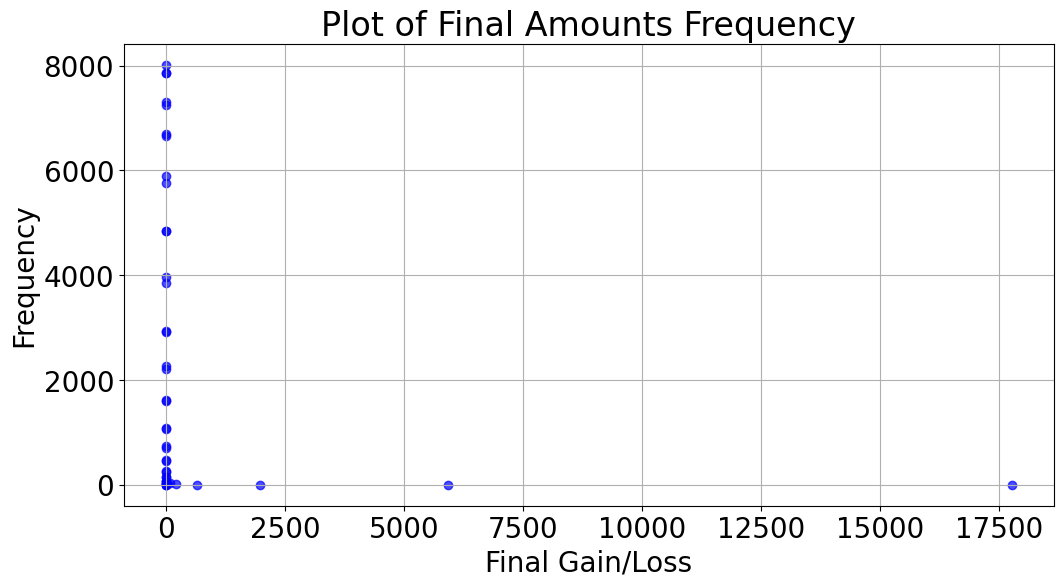

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def simulate_gambling(start_money, iterations):
    money = start_money
    for _ in range(iterations):
        save = money / 2.0
        gamble = money / 2.0
        if np.random.rand() < 0.5:
            gamble = 0  # lost the bet
        else:
            gamble = 2*gamble  # won the bet
        money = save + gamble
    return money

# Set parameters
start_money = 1.0  # Starting amount of money
iterations = 100  # Number of iterations (bets) in each run
num_runs = 100000  # Number of people in the economy

# Run the simulation

final_amounts = []
for _ in range(num_runs):
        final_money = simulate_gambling(start_money, iterations)
        final_amounts.append(final_money)

# Calculate frequency of each final amount
amounts_freq = Counter(final_amounts)
print(" Total and maximum  Money",round(sum(final_amounts)/num_runs/start_money,6),round(max(final_amounts)/sum(final_amounts)*100,2),"%")

# Set font size globally
plt.rcParams.update({'font.size': 20})  # Adjust the base font size.

# Plotting data in a scatter plot on log-log scales
plt.figure(figsize=(12, 6))
plt.scatter(amounts, freqs, color='blue', alpha=0.7)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Plot of Final Amounts Frequency")
plt.xlabel("Final Gain/Loss")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
